In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import math

In [ ]:
!pip3 install -q pandas

In [ ]:
dataset_path = '/content/Titanic_db.csv'

In [ ]:
df = pd.read_csv('/content/Titanic_db.csv')
df.head()

,id,Name,PClass,Age,Sex,Survived
0,1,"Allen, Miss Elisabeth Walton",1st,29.00,female,1
1,2,"Allison, Miss Helen Loraine",1st,2.00,female,0
2,3,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0
3,4,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0
4,5,"Allison, Master Hudson Trevor",1st,0.92,male,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        1313 non-null   int64  
 1   Name      1313 non-null   object 
 2   PClass    1312 non-null   object 
 3   Age       756 non-null    float64
 4   Sex       1313 non-null   object 
 5   Survived  1313 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 61.7+ KB


In [ ]:
print(df.describe())

                id         Age     Survived
count  1313.000000  756.000000  1313.000000
mean    657.000000   30.397989     0.342727
std     379.174762   14.259049     0.474802
min       1.000000    0.170000     0.000000
25%     329.000000   21.000000     0.000000
50%     657.000000   28.000000     0.000000
75%     985.000000   39.000000     1.000000
max    1313.000000   71.000000     1.000000


In [ ]:
df.dtypes

id            int64
Name         object
PClass       object
Age         float64
Sex          object
Survived      int64
dtype: object

In [ ]:
df.select_dtypes(include=['number']).mean()

id          657.000000
Age          30.397989
Survived      0.342727
dtype: float64

In [ ]:
df.Age = pd.to_numeric(df.Age, errors='coerce')

In [ ]:
# find existing null values
df.isnull().sum()

id            0
Name          0
PClass        1
Age         557
Sex           0
Survived      0
dtype: int64

In [ ]:
df.isnull().sum() / len(df) * 100

id           0.000000
Name         0.000000
PClass       0.076161
Age         42.421935
Sex          0.000000
Survived     0.000000
dtype: float64

In [ ]:
column_drop=df.dropna(axis=1)
column_drop

,id,Name,Sex,Survived
0,1,"Allen, Miss Elisabeth Walton",female,1
1,2,"Allison, Miss Helen Loraine",female,0
2,3,"Allison, Mr Hudson Joshua Creighton",male,0
3,4,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",female,0
4,5,"Allison, Master Hudson Trevor",male,1
...,...,...,...,...
1308,1309,"Zakarian, Mr Artun",male,0
1309,1310,"Zakarian, Mr Maprieder",male,0
1310,1311,"Zenni, Mr Philip",male,0
1311,1312,"Lievens, Mr Rene",male,0


In [ ]:
mean_numeric = df
mean_numeric

,id,Name,PClass,Age,Sex,Survived
0,1,"Allen, Miss Elisabeth Walton",1st,29.00,female,1
1,2,"Allison, Miss Helen Loraine",1st,2.00,female,0
2,3,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0
3,4,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0
4,5,"Allison, Master Hudson Trevor",1st,0.92,male,1
...,...,...,...,...,...,...
1308,1309,"Zakarian, Mr Artun",3rd,27.00,male,0
1309,1310,"Zakarian, Mr Maprieder",3rd,26.00,male,0
1310,1311,"Zenni, Mr Philip",3rd,22.00,male,0
1311,1312,"Lievens, Mr Rene",3rd,24.00,male,0


In [ ]:
df.median()

<ipython-input-18-6d467abf240d>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


id          657.0
Age          28.0
Survived      0.0
dtype: float64

In [ ]:
df.std()

<ipython-input-19-ce97bb7eaef8>:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.std()


id          379.174762
Age          14.259049
Survived      0.474802
dtype: float64

In [ ]:
df.min()

<ipython-input-20-c3612c624a3f>:1: FutureWarning: The default value of numeric_only in DataFrame.min is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.min()


id                           1
Name        Abbing, Mr Anthony
Age                       0.17
Sex                     female
Survived                     0
dtype: object

In [ ]:
df.max()

<ipython-input-21-4c1ddf8920ff>:1: FutureWarning: The default value of numeric_only in DataFrame.max is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.max()


id                       1313
Name        vratil, Mr Michel
Age                      71.0
Sex                      male
Survived                    1
dtype: object

In [ ]:
problematic_value = 'Unknown'
df['PClass'] = df['PClass'].replace(problematic_value, 'Other')
updated_unique_pclass_values = df['PClass'].unique()
print("Updated unique PClass values:", updated_unique_pclass_values)

Updated unique PClass values: ['1st' '2nd' nan '3rd']


In [ ]:
df.nunique()

id          1313
Name        1310
PClass         3
Age           75
Sex            2
Survived       2
dtype: int64

In [ ]:
df['PClass'].value_counts()

3rd    711
1st    322
2nd    279
Name: PClass, dtype: int64

In [ ]:
missing_Pclass_rows = df[df['PClass'].isnull()]
print("Rows with missing values in 'PClass':")
print(missing_Pclass_rows)

Rows with missing values in 'PClass':
      id                 Name PClass  Age   Sex  Survived
456  457  Jacobsohn Mr Samuel    NaN  NaN  male         0


In [ ]:
missing_PClass_indices = df[df['PClass'].isnull()].index
print("Indices with missing values in the 'PClass' column:", missing_PClass_indices)

Indices with missing values in the 'PClass' column: Int64Index([456], dtype='int64')


In [ ]:
index_to_drop = 456
if index_to_drop in df.index:
    df = df.drop(index=index_to_drop)
print(df)

        id                                           Name PClass    Age  \
0        1                   Allen, Miss Elisabeth Walton    1st  29.00   
1        2                    Allison, Miss Helen Loraine    1st   2.00   
2        3            Allison, Mr Hudson Joshua Creighton    1st  30.00   
3        4  Allison, Mrs Hudson JC (Bessie Waldo Daniels)    1st  25.00   
4        5                  Allison, Master Hudson Trevor    1st   0.92   
...    ...                                            ...    ...    ...   
1308  1309                             Zakarian, Mr Artun    3rd  27.00   
1309  1310                         Zakarian, Mr Maprieder    3rd  26.00   
1310  1311                               Zenni, Mr Philip    3rd  22.00   
1311  1312                               Lievens, Mr Rene    3rd  24.00   
1312  1313                                 Zimmerman, Leo    3rd  29.00   

         Sex  Survived  
0     female         1  
1     female         0  
2       male         0  

In [ ]:
print (df.shape)

(1312, 6)


In [ ]:
row_count = len(df)
print(row_count)

1312


In [ ]:
df['PClass'].mode()

0    3rd
Name: PClass, dtype: object

In [ ]:
df.head(20)

,id,Name,PClass,Age,Sex,Survived
0,1,"Allen, Miss Elisabeth Walton",1st,29.00,female,1
1,2,"Allison, Miss Helen Loraine",1st,2.00,female,0
2,3,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0
3,4,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0
4,5,"Allison, Master Hudson Trevor",1st,0.92,male,1
5,6,"Anderson, Mr Harry",1st,47.00,male,1
6,7,"Andrews, Miss Kornelia Theodosia",1st,63.00,female,1
7,8,"Andrews, Mr Thomas, jr",1st,39.00,male,0
8,9,"Appleton, Mrs Edward Dale (Charlotte Lamson)",1st,58.00,female,1
9,10,"Artagaveytia, Mr Ramon",1st,71.00,male,0


In [ ]:
#Define the function
def ans_age(name):
  #Define the dictionary
  name_dict = {'A': 30, 'B': 0, 'C': 60, 'D': -8, 'E': 90,
        'F': -16, 'G': 120, 'H' :-17, 'I': 150,
        'J': -13, 'K': 180, 'L': -1, 'M': 210,
        'N': -15, 'O': 240, 'P': -4, 'Q': 270,
        'R': -12, 'S': 300, 'T': -7, 'U': 330,
        'V': -10, 'W': 360, 'X': -9, 'Y': 390,
        'Z': -5}
  #Capitalize all the characters
  name = name.upper()
  ans = 0
  for ch in name:
    if ch in name_dict:
      ans = ans + name_dict[ch]
    #else:
      #ans = ans + 0
  return round(ans / 365, 6)


In [ ]:
for index, value in enumerate(df['Age']):
    if(math.isnan(value)):
      name = df.at[index, 'Name']
      calc_age = ans_age(name)
      df.at[index, 'Age'] = calc_age
df.head(20)

KeyError: ignored

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1312 entries, 0 to 1312
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        1312 non-null   int64  
 1   Name      1312 non-null   object 
 2   PClass    1312 non-null   object 
 3   Age       1312 non-null   float64
 4   Sex       1312 non-null   object 
 5   Survived  1312 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 71.8+ KB


In [ ]:
output_file_name = "/content/Step1_Titanic.csv"
df.to_csv(output_file_name, index=False)

NameError: ignored

In [ ]:
df2 = pd.read_csv('/content/Step1_Titanic.csv')
df2

NameError: ignored

In [ ]:
df2.head(20)

,id,Name,PClass,Age,Sex,Survived
0,1,"Allen, Miss Elisabeth Walton",1st,29.000000,female,1
1,2,"Allison, Miss Helen Loraine",1st,2.000000,female,0
2,3,"Allison, Mr Hudson Joshua Creighton",1st,30.000000,male,0
3,4,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.000000,female,0
4,5,"Allison, Master Hudson Trevor",1st,0.920000,male,1
5,6,"Anderson, Mr Harry",1st,47.000000,male,1
6,7,"Andrews, Miss Kornelia Theodosia",1st,63.000000,female,1
7,8,"Andrews, Mr Thomas, jr",1st,39.000000,male,0
8,9,"Appleton, Mrs Edward Dale (Charlotte Lamson)",1st,58.000000,female,1
9,10,"Artagaveytia, Mr Ramon",1st,71.000000,male,0


In [ ]:
def fare_calculation(row):
  #for i, row in df2.iterrows():
    #fare = fare_calculation(row['Age'], row['Sex'], row['PClass'], row['Name'])
    fare = 0

# PClass calculation
    if row["PClass"] == "1st":
      fare += 100
    elif row["PClass"] == "2nd":
      fare += 70
    elif row["PClass"] == "3rd":
      fare += 50

# Age calculation
    #fare = 0
    if row["Age"] < 18:
      fare *= 0.8
    elif 18 <= row["Age"] <= 60:
      fare *= 1.1
    elif row["Age"] > 60:
      fare *= 0.85

# Sex calculation
    #fare = 0
    if row["Sex"] == "female":
      fare *= 0.9

# First letter calculation
    #fare = 0
    first_letter = row["Name"][0].upper()
    if 'A' <= first_letter <= 'E':
      fare -= 5
    elif 'F' <= first_letter <= 'J':
      fare += 10
    elif 'K' <= first_letter <= 'O':
      fare -= 15
    elif 'P' <= first_letter <= 'T':
      fare += 20
    elif 'U' <= first_letter <= 'Z':
      fare -= 25

# Character-based calculationel
    #fare = 0
    for char in row["Name"].lower():
      if char == 'a':
        fare += 3
      elif char == 'e':
        fare -= 2
      elif char == 'i':
        fare += 4
      elif char == 'o':
        fare -= 1
      elif char == 'u':
        fare += 5

# Name length calculation
    #fare = 0
    name_length = len(row["Name"])
    if name_length < 10:
      fare *= 0.95
    elif 10 <= name_length <= 20:
      fare *= 0.9
    elif 21 <= name_length <= 30:
      fare *= 1.15
    elif name_length > 30:
      fare *= 1.2

    return round(fare, 2)

df2['fare'] = df2.apply(fare_calculation, axis=1)

print(df2)

NameError: ignored

In [ ]:
output_file_name = "Step2_Titanic.csv"
df2.to_csv(output_file_name, index=False)

In [ ]:
df3 = pd.read_csv('/content/Step2_Titanic.csv')
df3

,id,Name,PClass,Age,Sex,Survived,fare
0,1,"Allen, Miss Elisabeth Walton",1st,29.00,female,1,119.60
1,2,"Allison, Miss Helen Loraine",1st,2.00,female,0,88.55
2,3,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0,147.60
3,4,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0,133.20
4,5,"Allison, Master Hudson Trevor",1st,0.92,male,1,95.45
...,...,...,...,...,...,...,...
1307,1309,"Zakarian, Mr Artun",3rd,27.00,male,0,45.90
1308,1310,"Zakarian, Mr Maprieder",3rd,26.00,male,0,52.90
1309,1311,"Zenni, Mr Philip",3rd,22.00,male,0,36.00
1310,1312,"Lievens, Mr Rene",3rd,24.00,male,0,32.40


In [ ]:
df3.isnull().sum()

id          0
Name        0
PClass      0
Age         0
Sex         0
Survived    0
fare        0
dtype: int64

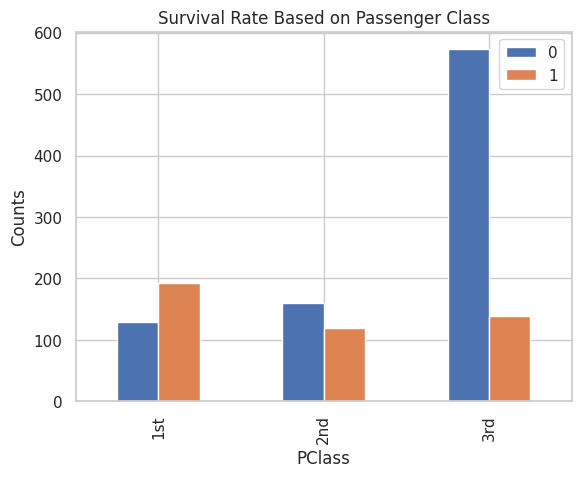

In [ ]:
Survived_vs_PClass = df3.groupby(['PClass', 'Survived']).size().unstack()
ax = Survived_vs_PClass.plot(kind='bar', stacked=False)
plt.xlabel('PClass')
plt.ylabel('Counts')
plt.title('Survival Rate Based on Passenger Class')
plt.legend(['0', '1'], loc='upper right')
plt.show()

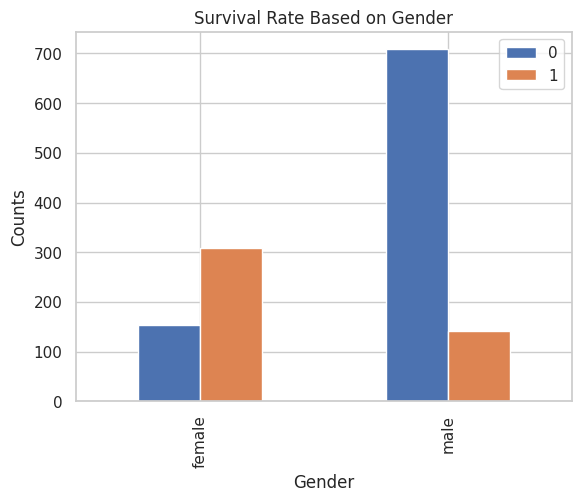

In [ ]:
Gender_vs_Survived = df3.groupby(['Sex', 'Survived']).size().unstack()
ax = Gender_vs_Survived.plot(kind='bar', stacked=False)
plt.xlabel('Gender')
plt.ylabel('Counts')
plt.title('Survival Rate Based on Gender')
plt.legend(['0', '1'], loc='upper right')
plt.show()

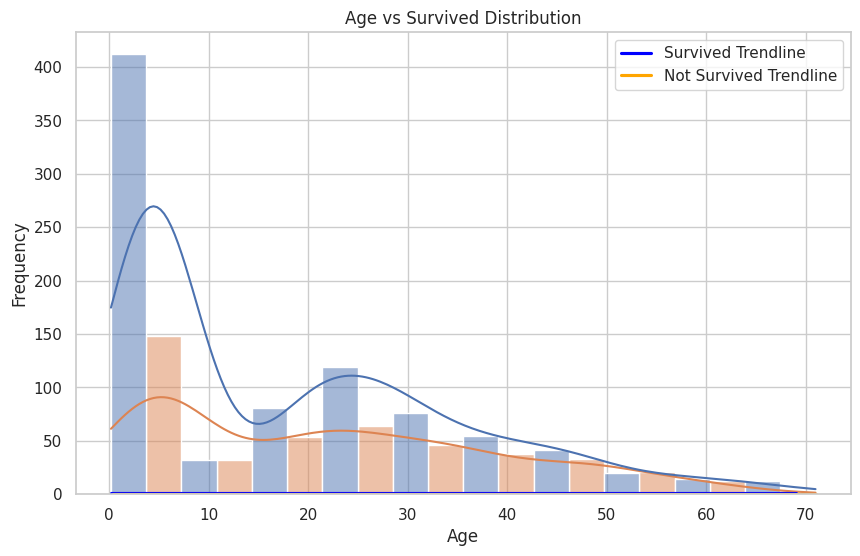

In [ ]:
sns.set(style="whitegrid")

# Create a bar plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the distribution using seaborn's histplot
sns.histplot(data=df2, x='Age', hue='Survived', multiple="dodge", bins=10, kde=True, ax=ax)

# Add a trendline
sns.regplot(data=df2[df2['Survived'] == 1], x='Age', y='Survived', scatter=False, color='blue', label='Survived Trendline')
sns.regplot(data=df2[df2['Survived'] == 0], x='Age', y='Survived', scatter=False, color='orange', label='Not Survived Trendline')

# Set labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age vs Survived Distribution')

plt.legend()

# Show the plot
plt.show()

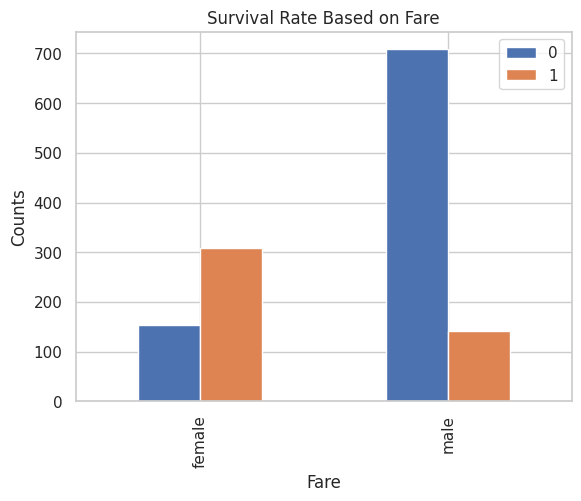

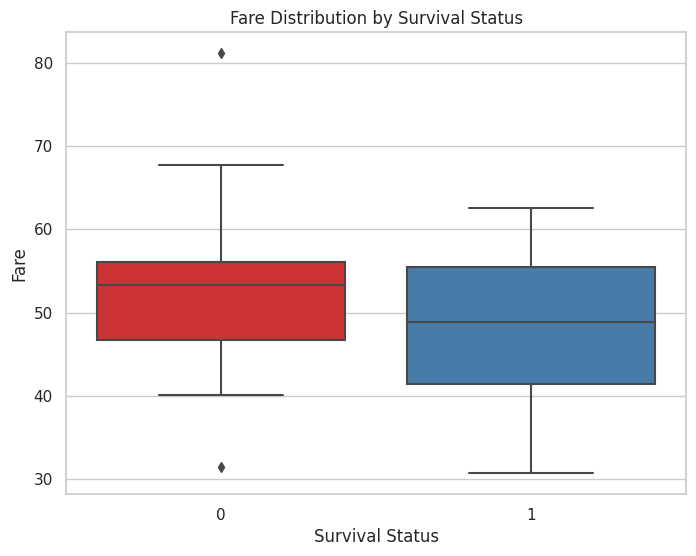

In [ ]:
# Creating a sample DataFrame (replace this with your actual data)
data = {
    'Survived': np.random.choice([0, 1], size=50),
    'fare': np.random.normal(loc=50, scale=10, size=50)
}

df3 = pd.DataFrame(data)

sns.set(style="whitegrid")

# Create a boxplot for Fare with respect to Survival
plt.figure(figsize=(8, 6))
sns.boxplot(x='Survived', y='fare', data=df3, palette='Set1')

# Set labels and title
plt.xlabel('Survival Status')
plt.ylabel('Fare')
plt.title('Fare Distribution by Survival Status')

# Show the plot
plt.show()